# TP6 - Boston Housing Price
## Mateus Ribeiro da Silva

In [440]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [441]:
#Load dataset
true_news = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBHP/data/housing_data.csv")
true_news.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [442]:
#Check out general info abou dataset
true_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [443]:
#Check out if there are missing data
true_news.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [444]:
#As dataset does not have a large amount of data, the missing data can be replaced using mean function.
df_cleaned = true_news.fillna(true_news.mean())
df_cleaned.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.980000,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.140000,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.030000,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.940000,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,12.715432,36.2


In [445]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


/home/mateusrib/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


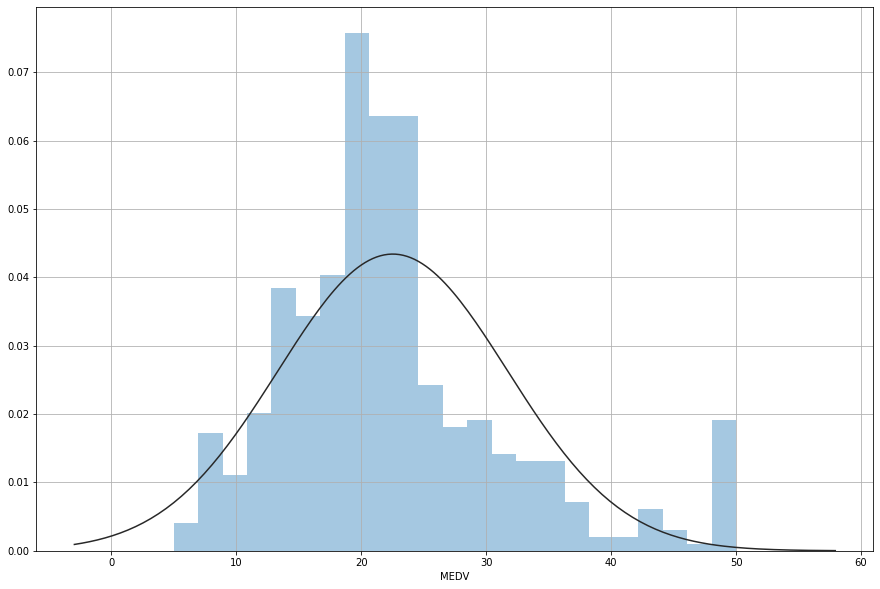

In [446]:
#Through all features, the MEDV (Median value of owner-occupied homes in $1000's), according to StatLib archive in http://lib.stat.cmu.edu/datasets/boston, seems to be the target variable, so it would be interesting check some statistical information about it.

#Normal distribution analysis
plt.figure(figsize=(15,10))
plt.grid()
sns.distplot(df_cleaned['MEDV'], fit=norm, kde=False)

/home/mateusrib/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/mateusrib/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/mateusrib/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

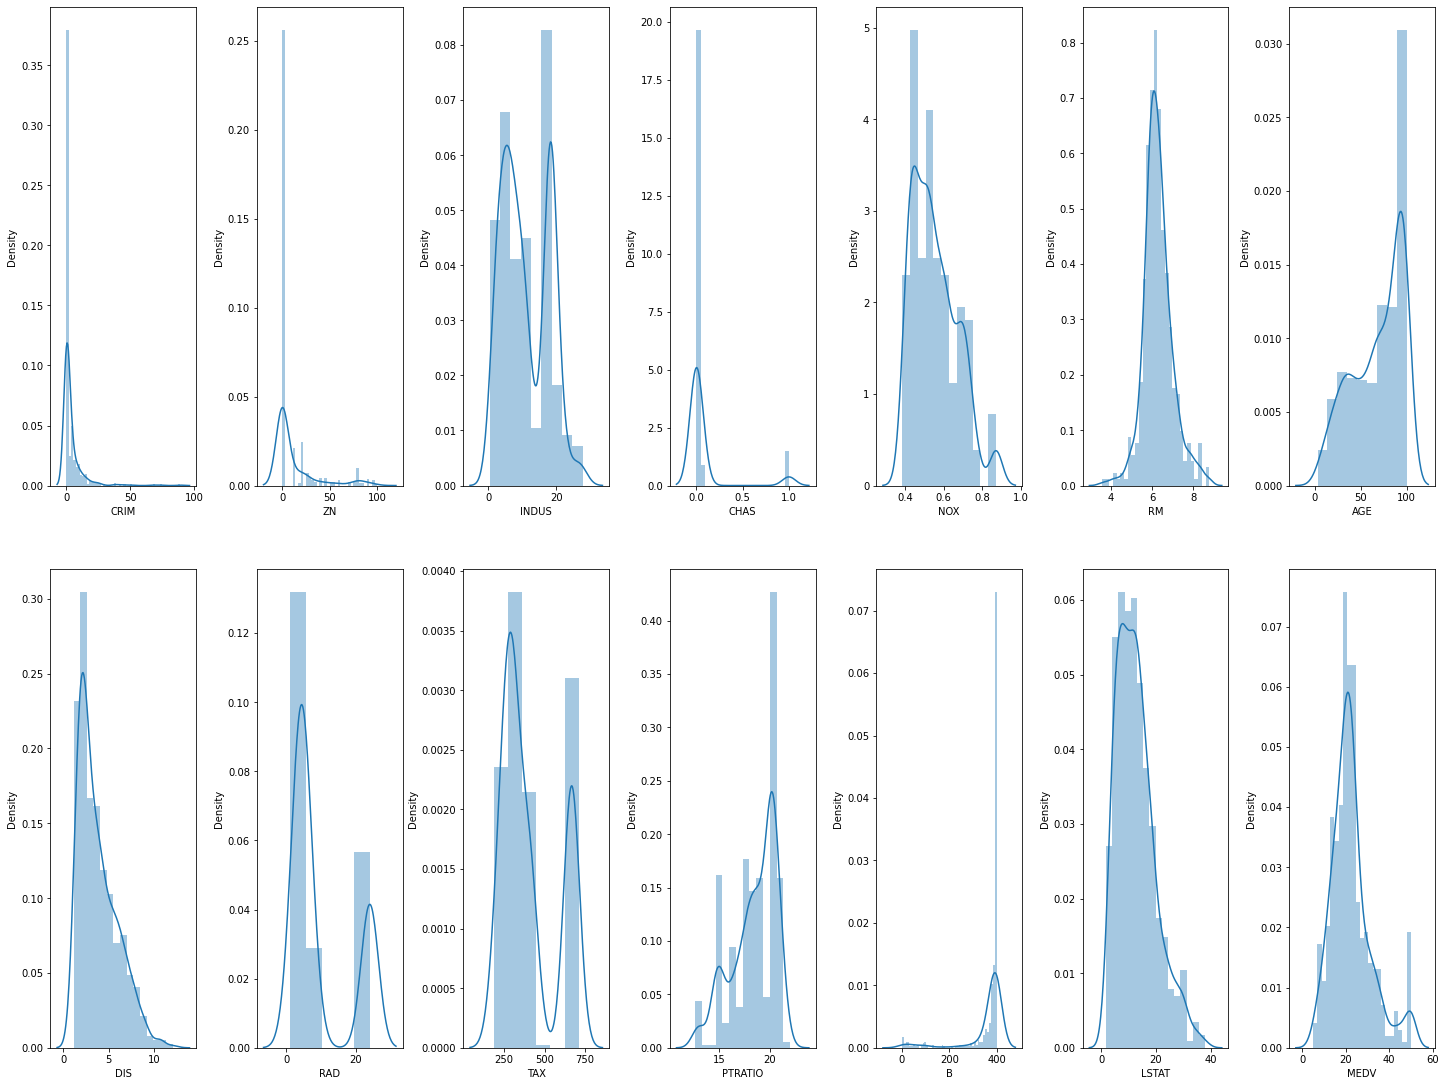

In [447]:
#
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 15))
index = 0
axs = axs.flatten()
for k,v in df_cleaned.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

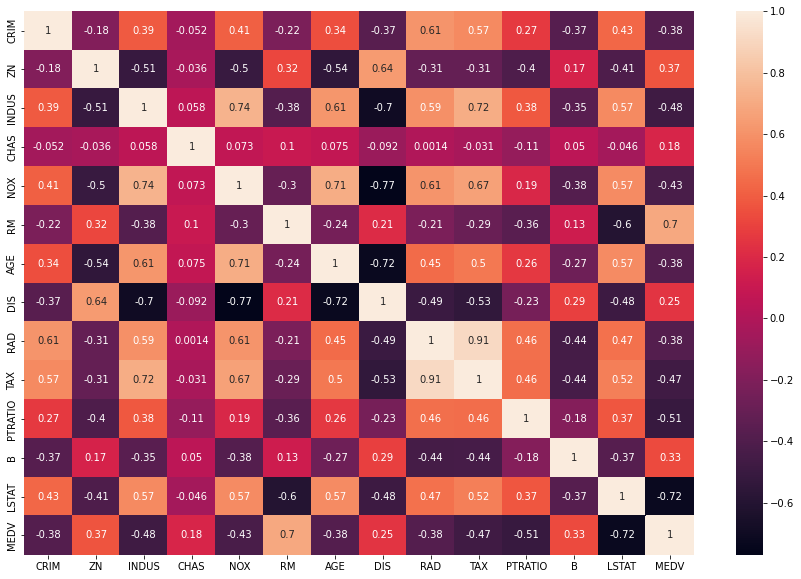

In [448]:
#Correlation Analysis
plt.figure(figsize=(15,10))
sns.heatmap(df_cleaned.corr(), annot=True)

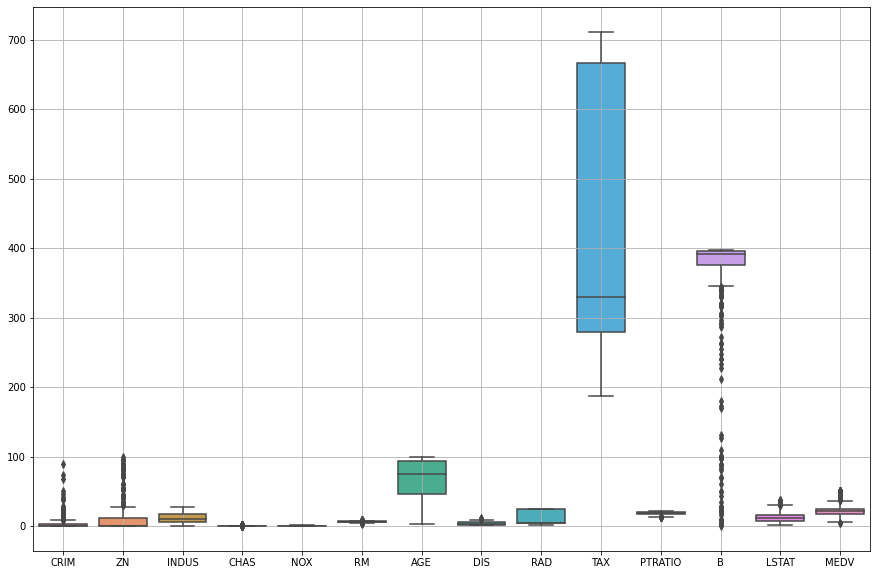

In [449]:
#Outliers analysis
plt.figure(figsize=(15,10))
sns.boxplot(data = df_cleaned)
plt.grid()

In [450]:
#Looking at the obtained plots it was possible to check the following assumptions:
# 1 - The MEDV target seems to have a normal distributions, however, it has some outliers;
# 2-  Taking a look in the last row of heatmap correlation it's possible to see that the variables LSTAT (lower status of the population - -0.72) and RM (average number of rooms per dwelling - 0.7) have a strong correlation with MEDV;
# 3 - From Box Plot it's clear that dataset has some outliers in most of features, in which could be treated by standardization process;
# 4 - RAD(index of accessibility to radial highways) and TAX(full-value property-tax rate per $10,000) are highly correlated, which is a sign to drop out some of these two features. The multicollinearity have to be avoided because it turns hard to distinguish the influence of RAD in MEDV once it has a strong correlation with TAX;
# 5 - CRIM(per capita crime rate by town), ZN(proportion of residential land zoned for lots over 25,000 sq.ft.) and B(1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town) have a great skewness distribution.

#Stardardization

#Separate dataset
X = df_cleaned.iloc[:, 0:13]
y = df_cleaned.iloc[:, 13]

#Instance StandardScalar class
scaler = StandardScaler()
#Fit dataset
X_scaled = scaler.fit_transform(X)

#Split dataset into test and train
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=0)

In [451]:
#Building Linear Regression model
lr = LinearRegression()

#Fitting model
lr.fit(X_train, y_train)

#Validate model through predictions
pred = lr.predict(X_test)

#Evaluate the error and accuracy of model
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)

print('Mean Squared Error:', mse)
print('Root Mean Absolute Error:', rmse)
print('R2 score', r2)

Mean Squared Error: 31.412197769446852
Root Mean Absolute Error: 5.604658577419936
R2 score 0.6155131417309041


In [452]:
#As we could imagine, the coeffiecients LSTAT and RM have a strong influence in model behaviour, in which LSTAT has a negative influence and, on the other hand, RM has a positive influence. It makes sense, because the more rooms the more expensive a house tends to be, and the less status of population in such region the less tend to be the price of house. Furthermore, we can see that DIS(weighted distances to five Boston employment centres) has a strong influence in model too, however it not seems to be a logical sense, because the closer is the house from Boston employments centres the more expensive would be, and as we can see, DIS has a negative influence.

coef = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficients'])
coef

,Coefficients
CRIM,-1.058611
ZN,0.822346
INDUS,-0.553270
CHAS,0.710030
NOX,-1.626143
RM,2.884534
AGE,-0.691023
DIS,-3.085802
RAD,1.673588
TAX,-1.458816


/home/mateusrib/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


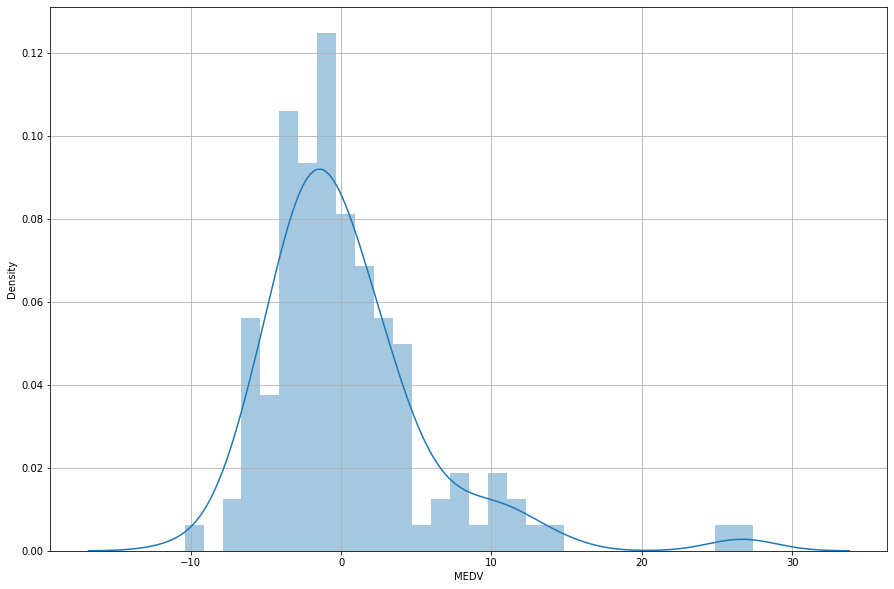

In [453]:
#Analyzing the plot below, it's possible to see that residuals has a normal distribution, which is a good indication to the trained linear model.
plt.figure(figsize=(15,10))
plt.grid()
sns.distplot((y_test - pred), bins=30)

In [454]:
#Let's try to remove the features high correlated each other, i.e, TAX and RAD. TAX will be maintened due to the fact that its distribution is more normal distributed. Furthermore, let's normalize the data which contain skewness or binormal distributions using log function.

df_cleaned.drop(['RAD'], axis=1, inplace=True)

cols_norm = ['CRIM', 'NOX', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'LSTAT', 'B']

for col in cols_norm:
    X_new[col] = np.log1p(df_cleaned[col])

X_new

,CHAS,RM,TAX,PTRATIO,B,LSTAT,CRIM,NOX,AGE,DIS
0,0.0,6.575,5.693732,2.791165,5.986201,1.788421,0.006300,0.430483,4.192680,1.627278
1,0.0,6.421,5.493061,2.933857,5.986201,2.316488,0.026944,0.384582,4.380776,1.786261
2,0.0,7.185,5.493061,2.933857,5.975919,1.615420,0.026924,0.384582,4.128746,1.786261
3,0.0,6.998,5.407172,2.980619,5.980479,1.371181,0.031857,0.377066,3.845883,1.954757
4,0.0,7.147,5.407172,2.980619,5.986201,2.618522,0.066770,0.377066,4.010963,1.954757
...,...,...,...,...,...,...,...,...,...,...
501,0.0,6.593,5.613128,3.091042,5.973784,2.618522,0.060747,0.452985,4.249923,1.246630
502,0.0,6.120,5.613128,3.091042,5.986201,2.310553,0.044275,0.452985,4.352855,1.190127
503,0.0,6.976,5.613128,3.091042,5.986201,1.893112,0.058986,0.452985,4.521789,1.152943
504,0.0,6.794,5.613128,3.091042,5.977492,2.012233,0.103991,0.452985,4.503137,1.220505


In [455]:
#Split dataset into test and train
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.25, random_state=0)

#Instance new model
lr_new = LinearRegression()

#Fitting model
lr_new.fit(X_train, y_train)

#Validate model through predictions
pred_new = lr_new.predict(X_test)

#Evaluate the error and accuracy of model
mse = mean_squared_error(y_test, pred_new)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred_new)

#As we can see in the metrics below, removing RAD and renormalizing the data using log function to reduce skewness in distribution turns the model more accurate.

print('Mean Squared Error:', mse)
print('Root Mean Absolute Error:', rmse)
print('R2 score', r2)

Mean Squared Error: 27.278930525442743
Root Mean Absolute Error: 5.222923561133433
R2 score 0.6661045377452075


In [456]:
coef = pd.DataFrame(lr_new.coef_, X_new.columns, columns=['Coefficients'])
coef

,Coefficients
CHAS,2.964545
RM,3.612628
TAX,-1.900638
PTRATIO,-15.197707
B,0.606638
LSTAT,-8.674043
CRIM,-0.442359
NOX,-23.718780
AGE,-0.215907
DIS,-6.617737


/home/mateusrib/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


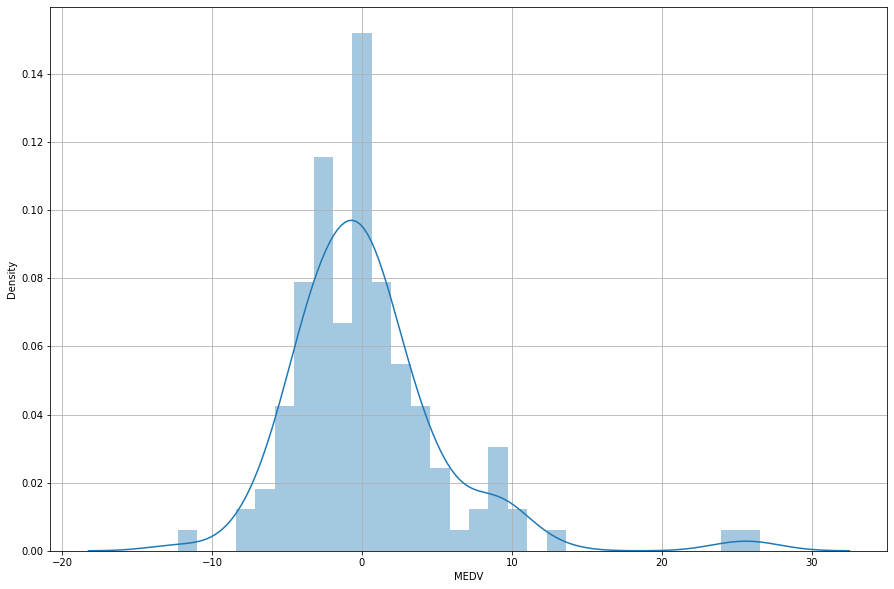

In [457]:
#Analyzing the plot below, the residual seems to be a normal distribution too.
plt.figure(figsize=(15,10))
plt.grid()
sns.distplot((y_test - pred_new), bins=30)

In [458]:
#Comparing the accurate of linear model regression with Random Forest Regressor, we can see that Random Forest presents a more accurate model

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

pred_random = rfr.predict(X_test)

#Evaluate the error and accuracy of model
mse = mean_squared_error(y_test, pred_random)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred_random)

print('Mean Squared Error:', mse)
print('Root Mean Absolute Error:', rmse)
print('R2 score', r2)

Mean Squared Error: 15.244932464566931
Root Mean Absolute Error: 3.9044759526173203
R2 score 0.813401270715064


/home/mateusrib/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


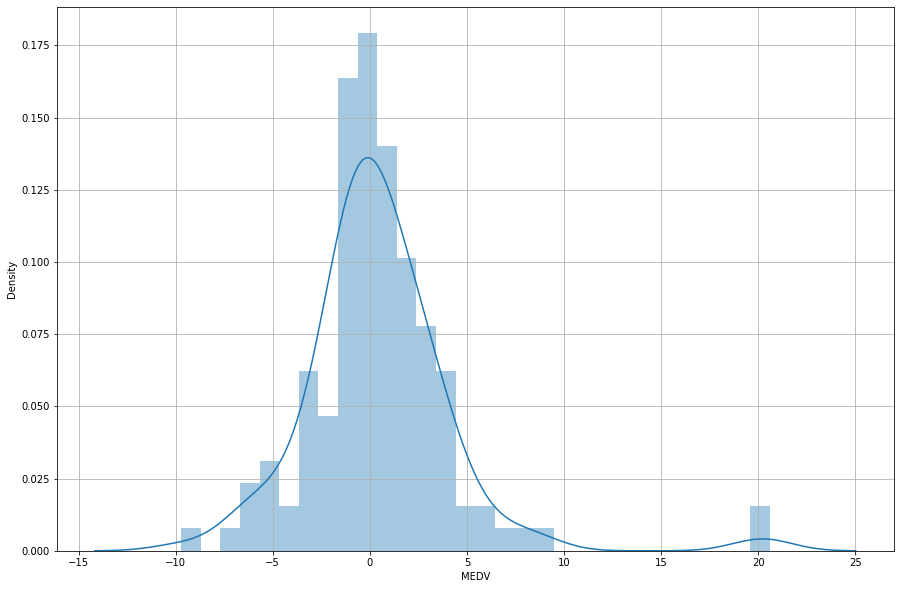

In [459]:
#Analyzing the plot below, the residual seems to be a normal distribution too.
plt.figure(figsize=(15,10))
plt.grid()
sns.distplot((y_test - pred_random), bins=30)